In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('dataset/HR.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [207]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [208]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [209]:
df.shape

(14999, 10)

In [210]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [211]:
df.shape

(11991, 10)

In [212]:
df[df.duplicated()]

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department, salary]
Index: []

left is our target value. Rearranging the column for better viewing

In [213]:
list(df)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [214]:
df = df[['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department',
 'salary',
  'left']]

In [215]:
col_name = list(df)
rename_col = dict(zip(col_name,[col.lower() for col in col_name]))

df = df.rename(columns=rename_col)

In [216]:
df.head(1)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  work_accident  promotion_last_5years department salary  \
0                   3              0                      0      sales    low   

   left  
0     1

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


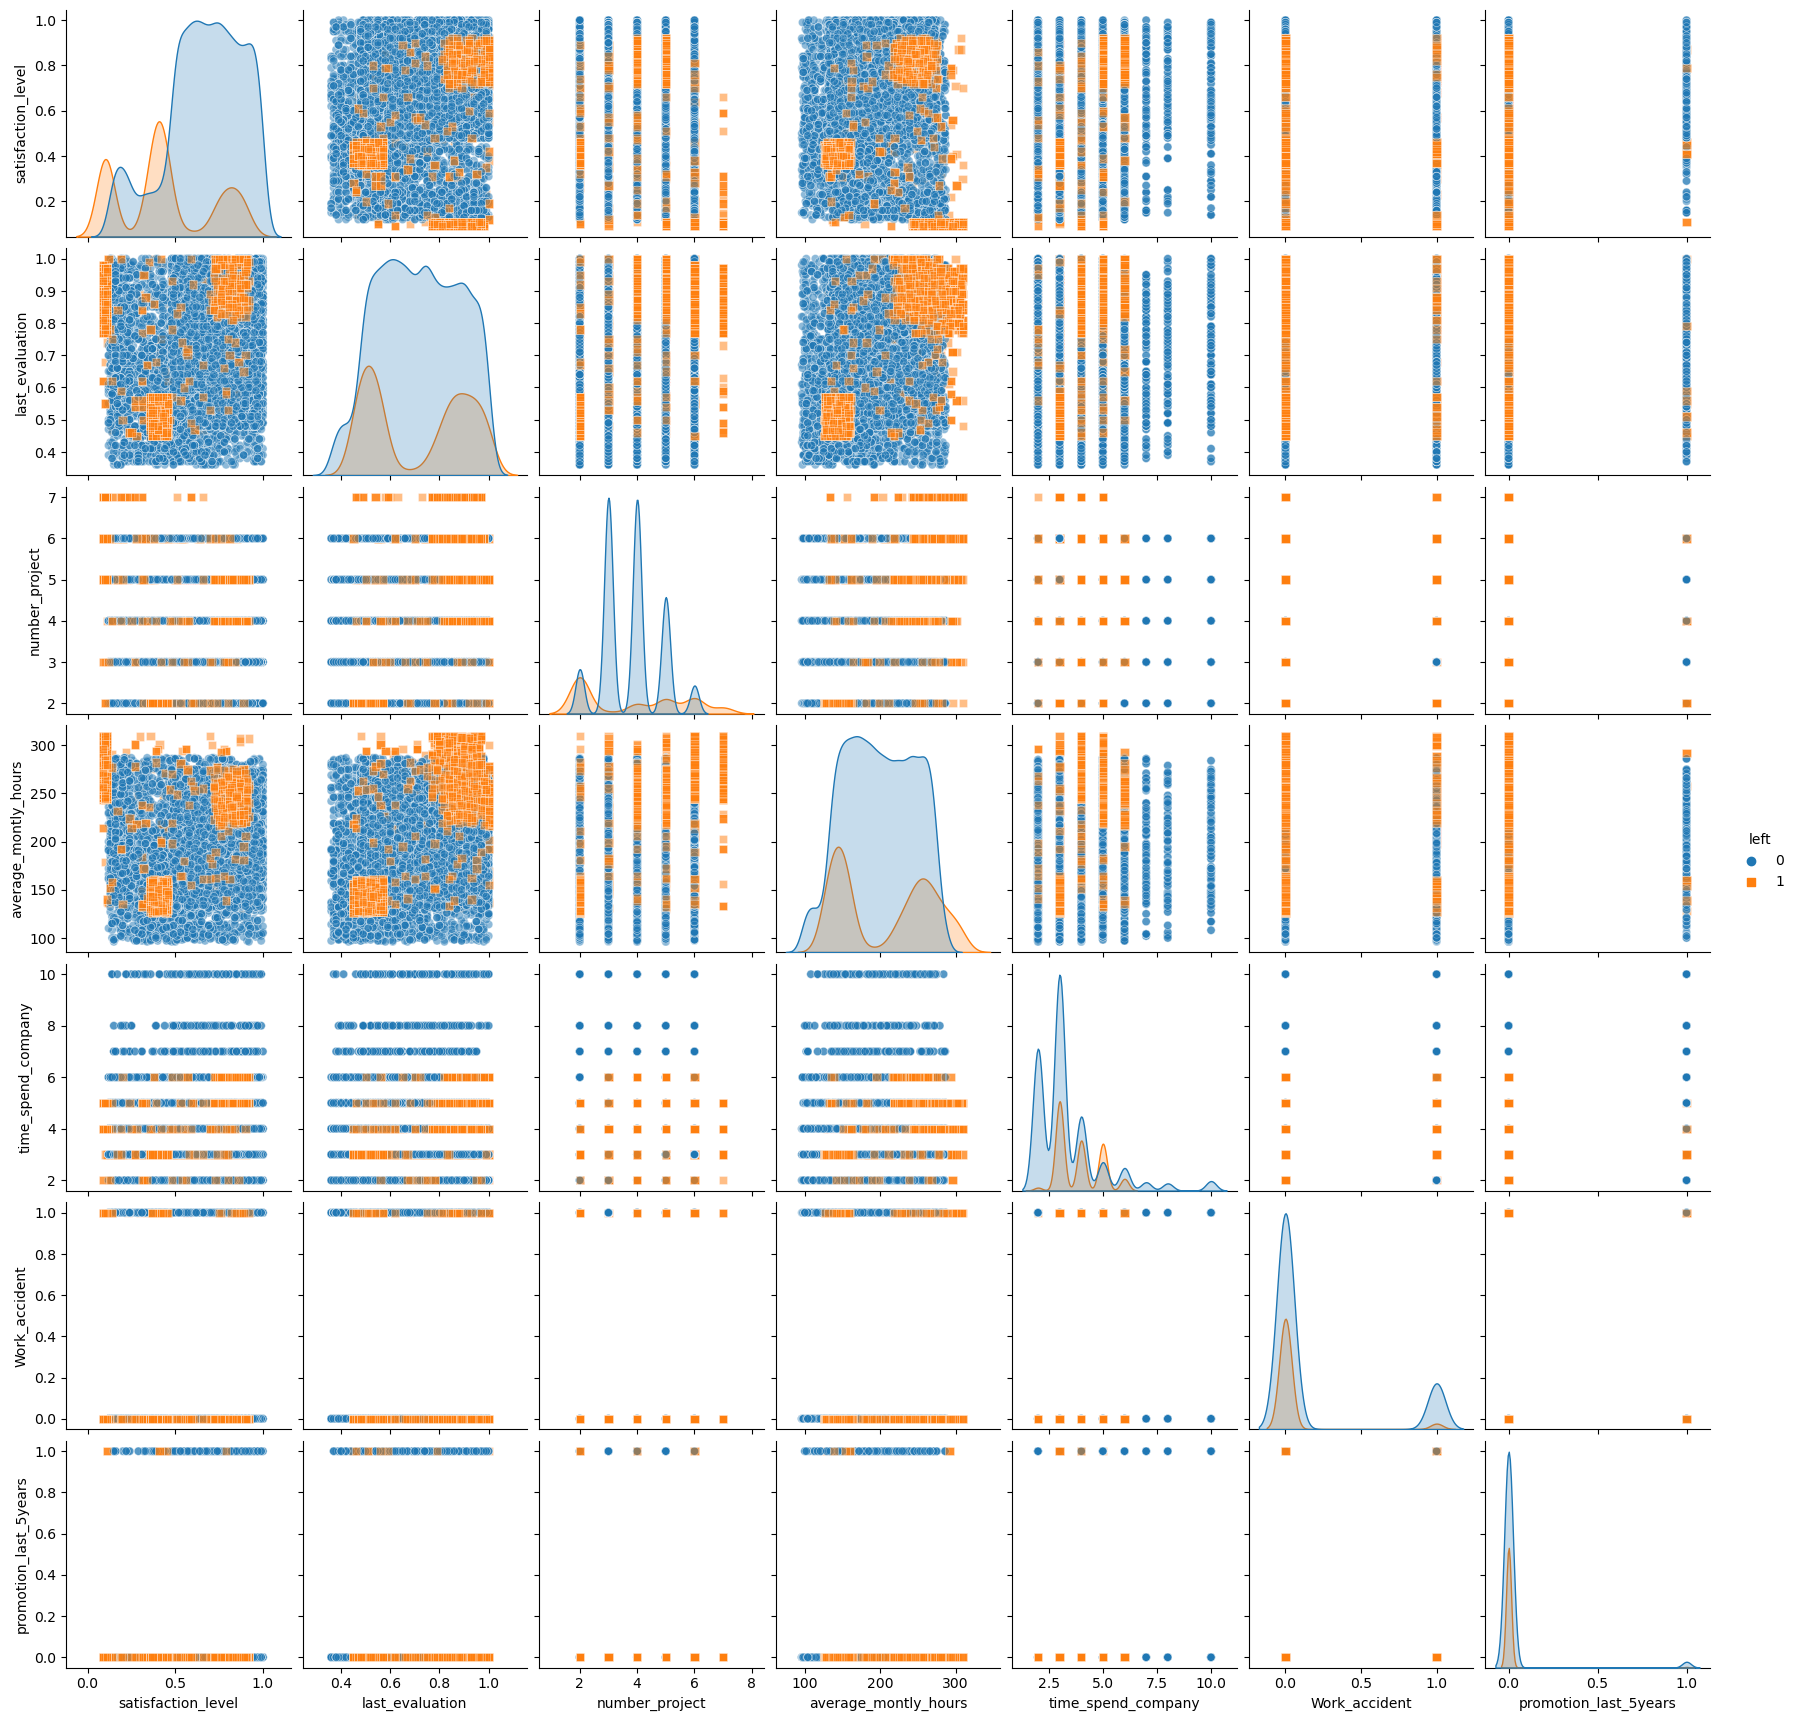

In [20]:
sns.pairplot(df, hue='left', diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.5})

### Key Points from the Above Graphs:

- People who have not been promoted in the last 5 years are more likely to leave the company. Additionally, employees with a tenure of up to 6 years are also more likely to leave.
- The chart shows that employees who work longer hours on average and handle more projects are more likely to leave.
- A lower satisfaction level significantly increases the likelihood of leaving.
- Work accidents do not appear to have much importance in the machine learning model.


In [217]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [218]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [219]:
y = df['left']
X = df.drop(columns=['left'])

# List of columns for scaling
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Columns to be label encoded
categorical_cols = ['department', 'salary']

# Binary features that remain unchanged
binary_cols = ['work_accident', 'promotion_last_5years']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X['department'] = label_encoder.fit_transform(X['department'])
X['salary'] = label_encoder.fit_transform(X['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [220]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -1.035668        -1.108990       -1.549921             -0.892208   
1            0.706637         0.851380        1.029194              1.262709   
2           -2.155721         0.970190        2.748604              1.467939   
3            0.374770         0.910785        1.029194              0.462311   
4           -1.077151        -1.168396       -1.549921             -0.851162   

   time_spend_company  work_accident  promotion_last_5years  department  \
0           -0.274291              0                      0           7   
1            1.981036              0                      0           7   
2            0.477485              0                      0           7   
3            1.229261              0                      0           7   
4           -0.274291              0                      0           7   

   salary  
0       1  
1       2  
2       2  
3       1  
4       1

### Model Training

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression(max_iter=1000)

param_grid = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs'] 
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [222]:
model = grid_search.best_estimator_
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [223]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [224]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

In [225]:
accuracy

0.834931221342226

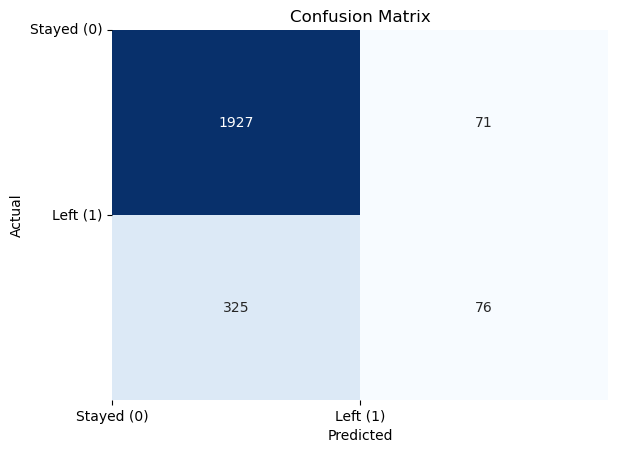

In [226]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xticks(ticks=[0, 1], labels=['Stayed (0)', 'Left (1)'], rotation=0)
plt.yticks(ticks=[0, 1], labels=['Stayed (0)', 'Left (1)'], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

The model exhibits 83.4% accuracy

In [227]:
import pickle


model_data = {
    'model': model,
    'scaler': scaler,
    'label_encoder': label_encoder
}

# Save the entire object as a pickle file
with open('artifacts/full_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model, scaler, and label encoder saved successfully as 'full_model.pkl'")

Model, scaler, and label encoder saved successfully as 'full_model.pkl'


## END